<a href="https://colab.research.google.com/github/Germ1215/100-Days-Of-ML-Code/blob/master/Tarea9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea 9** : Red bayesiana
Jesús Germán Galdámez Ovando
2023-12-03
Maestría en Análisis Estadístico y Computación

(INEGI-CIMAT)

Curso: Cómputo Estadístico

Tema: Red bayesiana

Tarea: 3

Fecha de Entrega: Domingo 3 de diciembre de 2023.

Consideremos el conjunto de datos sintéticos asia de Lauritzen y Spiegelhalter (1988) que describe el diagnóstico de un paciente en una clínica de tórax que acaba de regresar de un viaje a Asia y que presenta disnea. (La disnea es la dificultad respiratoria o falta de aire).

Conjunto de datos de Asia (sintéticos) de Lauritzen y Spiegelhalter Descripción Pequeño conjunto de datos sintéticos de Lauritzen y Spiegelhalter (1988) sobre enfermedades pulmonares (tuberculosis, cáncer de pulmón o bronquitis) y visitas a Asia.
El conjunto de datos contiene las siguientes variables:

* A(visita a Asia), un factor de dos niveles con niveles **yes** y **no**.
* S(fumar), un factor de dos niveles con niveles **yes** y **no**.
* T(tuberculosis), un factor de dos niveles con niveles **yes** y **no**.
* L(cáncer de pulmón), un factor de dos niveles con niveles **yes** y **no**.
* B(bronquitis), un factor de dos niveles con niveles **yes** y **no**.
* E(tuberculosis versus cáncer de pulmón/bronquitis), un factor de dos niveles con niveles **yes** y **no**.
* X(radiografía de tórax), un factor de dos niveles con niveles **yes** y **no**.
* D(disnea), un factor de dos niveles con niveles **yes** y **no**.

Instalar las siguientes librerias

In [ ]:
#install.packages("bnlearn")
#if(!require("BiocManager",quietly = TRUE))
  #install.packages("BiocManager")

#BiocManager::install(version="3.18")

#BiocManager::install(c("GenimicFeatures","AnnotationDbi"))

#BiocManager::install("Rgraphviz")
#install.packages("bnlearn")
# https://graphviz.org/

#install.packages("bnlearn")
#BiocManager::install('Rgraphviz')
#library(devtools)
#devtools::install_github("dkesada/dbnR")

In [ ]:
#Llamar las librerías
library(dbnR)
library(bnlearn)
library(Rgraphviz)

a) Cargue el conjunto de datos desde el paquete bnlearn e investigue sus características utilizando las técnicas de análisis exploratorio para determinar: ¿Qué tipo de variables posee? ¿posee datos faltantes? ¿cuál es la distribución de las variables? Dado el tipo de datos, ¿qué tipo de red bayesiana se puede ajustar?

In [67]:
data(asia)
str(asia)

'data.frame':	5000 obs. of  8 variables:
 $ A: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ S: Factor w/ 2 levels "no","yes": 2 2 1 1 1 2 1 2 2 2 ...
 $ T: Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ L: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ B: Factor w/ 2 levels "no","yes": 2 1 1 2 1 1 1 2 2 2 ...
 $ E: Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ X: Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ D: Factor w/ 2 levels "no","yes": 2 1 2 2 2 2 1 2 2 2 ...


Se define el conjunto de clases de objetos que representan y proporcionan una interfaz para diferentes tipos de variables. Todas las variables son de tipo *factor*, solo presentan dos clases o niveles (no, yes) que corresponde aun solo tipo de variables.

In [14]:
summary(asia)

   A          S          T          L          B          E          X       
 no :4958   no :2485   no :4956   no :4670   no :2451   no :4630   no :4431  
 yes:  42   yes:2515   yes:  44   yes: 330   yes:2549   yes: 370   yes: 569  
   D       
 no :2650  
 yes:2350  

Con la función *summary()* se puede investigar más a fondo las características del marco de datos de la tabla *asia* con las funciones de resumen y atenuación. En la matriz de datos contiene 5000 observaciones y 8 variables sobre enfermedades pulmonares (tuberculosis, cáncer de pulmón o bronquitis) y visitas a Asia. Todas las variables son categóricas y por tanto se almacenan como factores, además los valores que pueden asumir se pueden enumerar con la función de niveles.

In [13]:
colSums(is.na(asia))

A S T L B E X D 
0 0 0 0 0 0 0 0

Con la función *colSums* se puede saber de la existencia de valores faltantes (NA's). Para nuestro conjunto de datos, no se presentan valores faltantes.

In [18]:
levels(asia[,1]);levels(asia[,2]);levels(asia[,3])

[1] "no"  "yes"

[1] "no"  "yes"

[1] "no"  "yes"

La función *levels* muestra los niveles que presentan cada variable

In [11]:
table(asia[, c(3, 2, 1)])

'data.frame':	5000 obs. of  8 variables:
 $ A: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ S: Factor w/ 2 levels "no","yes": 2 2 1 1 1 2 1 2 2 2 ...
 $ T: Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ L: Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ B: Factor w/ 2 levels "no","yes": 2 1 1 2 1 1 1 2 2 2 ...
 $ E: Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ X: Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ D: Factor w/ 2 levels "no","yes": 2 1 2 2 2 2 1 2 2 2 ...


   A          S          T          L          B          E          X       
 no :4958   no :2485   no :4956   no :4670   no :2451   no :4630   no :4431  
 yes:  42   yes:2515   yes:  44   yes: 330   yes:2549   yes: 370   yes: 569  
   D       
 no :2650  
 yes:2350  

A S T L B E X D 
0 0 0 0 0 0 0 0

[1] "no"  "yes"

, , A = no

     S
T       no  yes
  no  2448 2468
  yes   21   21

, , A = yes

     S
T       no  yes
  no    15   25
  yes    1    1


Una forma alternativa y útil de mostrar estos datos es una tabla de contingencia, que se puede crear utilizando la función de *table*.

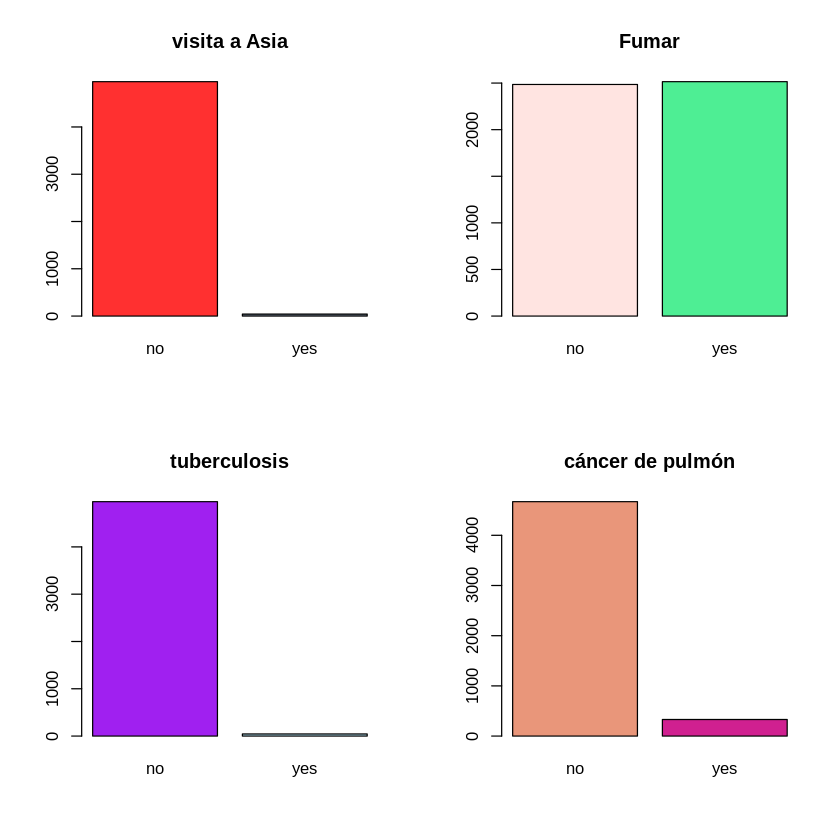

In [39]:
#install.packages("grDevices")
library(grDevices)
set.seed(26934)
palette2_all <- grDevices::colors()
palette2_no_gray <- palette2_all[grep("gr(a|e)y",grDevices::colors(),invert = T)]
par(mfrow = c(2, 2))
plot(asia[, "A"],main = "visita a Asia",col = sample(palette2_no_gray, 20))
plot(asia[, "S"],main = "Fumar",col = sample(palette2_no_gray, 20))
plot(asia[, "T"],main = "tuberculosis",col = sample(palette2_no_gray, 20))
plot(asia[, "L"],main = "cáncer de pulmón",col = sample(palette2_no_gray, 20))

El análisis de datos exploratorios a menudo incluye alguna forma de visualización gráfica de datos, especialmente cuando se trata de conjuntos de datos de baja dimensión como el que estamos considerando. Una forma sencilla de trazar las frecuencias asociadas con las frecuencias de las respuestas de cada variable es utilizar un diagrama de barras.

In [40]:
head(asia,5)

,A,S,T,L,B,E,X,D
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,no,yes,no,no,yes,no,no,yes
2,no,yes,no,no,no,no,no,no
3,no,no,yes,no,no,yes,yes,yes
4,no,no,no,no,yes,no,no,yes
5,no,no,no,no,no,no,no,yes



  Random/Generated Bayesian network

  model:
   [A][S][B|S][L|S][T|A][E|L:T][D|B:E][X|E] 
  nodes:                                 8 
  arcs:                                  8 
    undirected arcs:                     0 
    directed arcs:                       8 
  average markov blanket size:           2.50 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  generation algorithm:                  Empty 


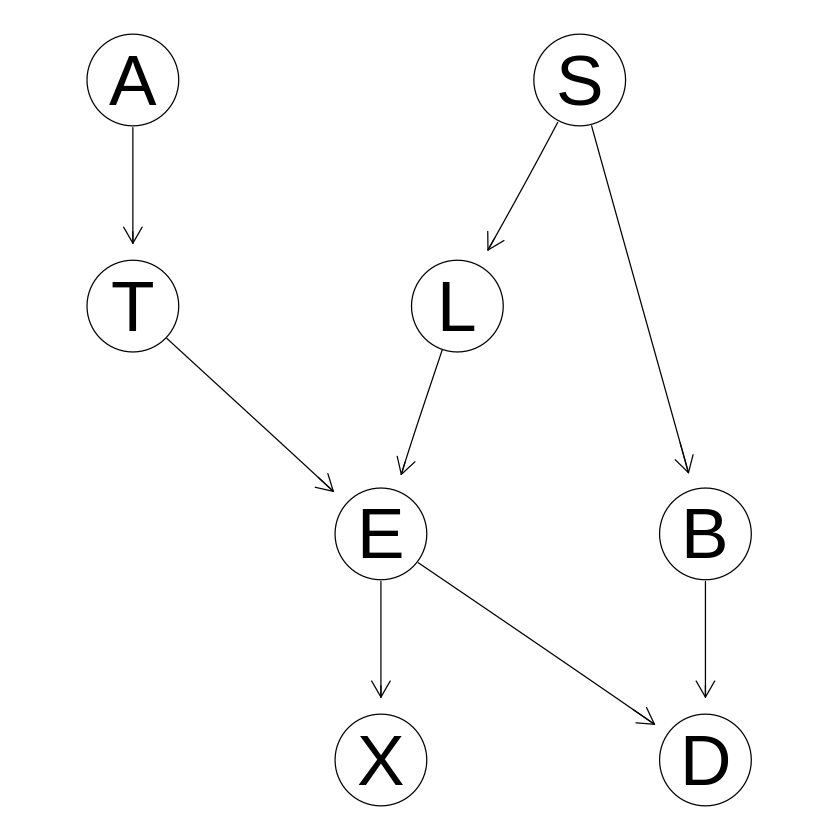

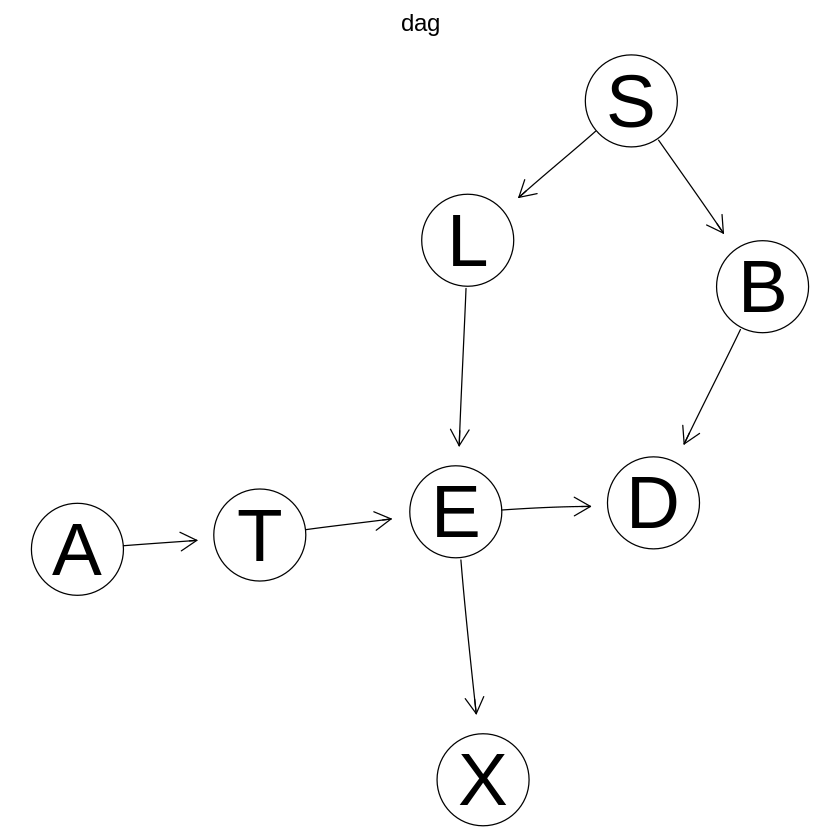

In [68]:

#colnames(asia) <- c("Asia", "Fuma", "Tuberculosis", "Cancer","Bronquitis", "Cualquiera", "RayosX", "Disnea")
dag <- model2network("[A][S][T|A][L|S][B|S][D|B:E][E|T:L][X|E]")
#dag <- model2network("[Asia][Fuma][Tuberculosis|Asia][Cancer|Fuma][Bronquitis|Fuma][Disnea|Bronquitis:Cualquiera][Cualquiera|Tuberculosis:Cancer][RayosX|Cualquiera]")
dag
graphviz.compare(dag)
graphviz.plot(dag, main = "dag",layout = "neato")

We advice you to set the imaginary sample size to more than 512 
Imaginary sample size: 5 
[Autosearch (1) -14055.39 [A][S][T][L][B|D][E][X][D]


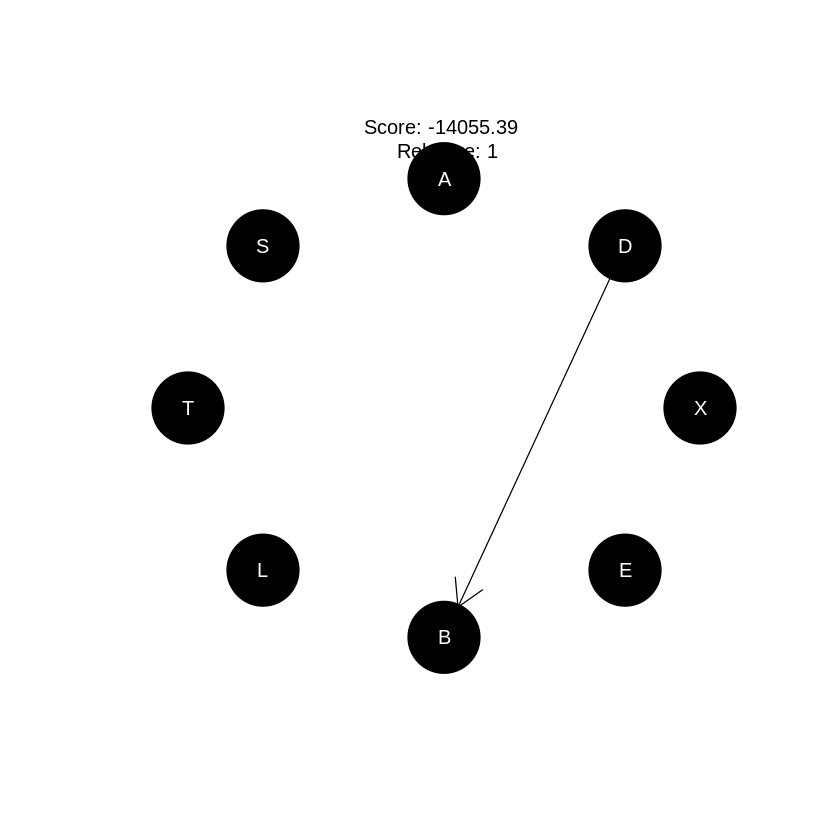

(2) -12973.47 [A][S][T][L|E][B|D][E][X][D]


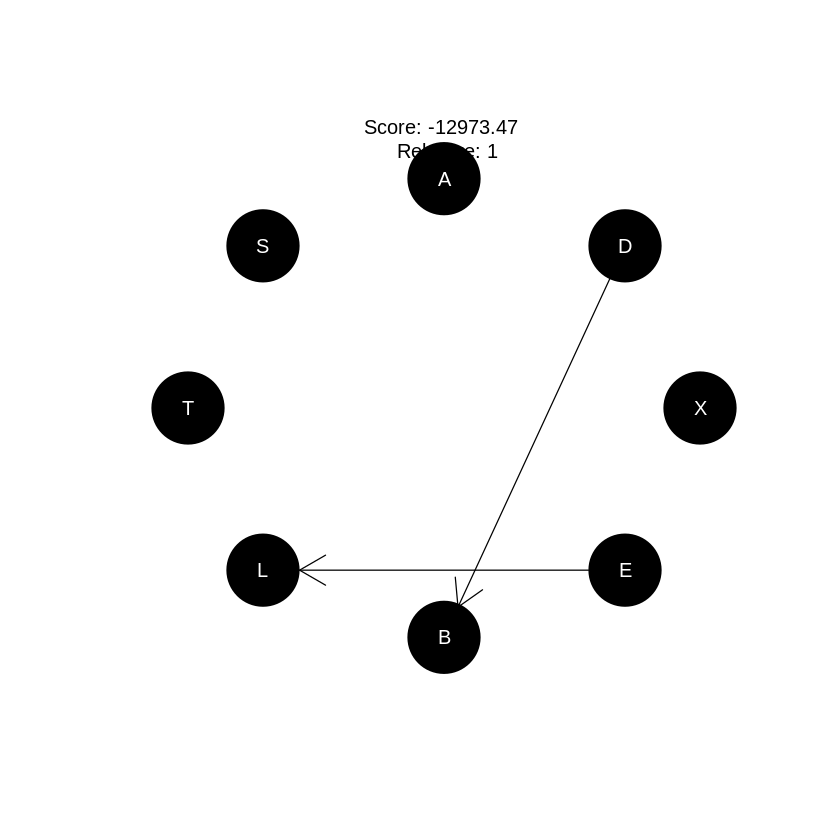

(3) -12046.34 [A][S][T][L|E][B|D][E|X][X][D]
.

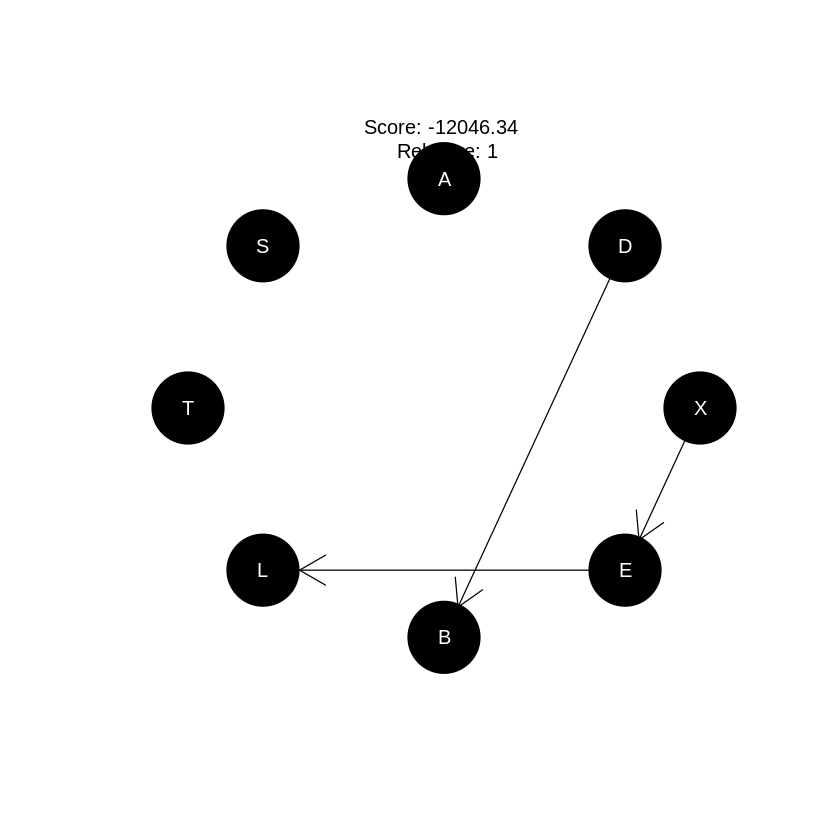

(4) -11598.9 [A][S|B][T][L|E][B|D][E|X][X][D]
..

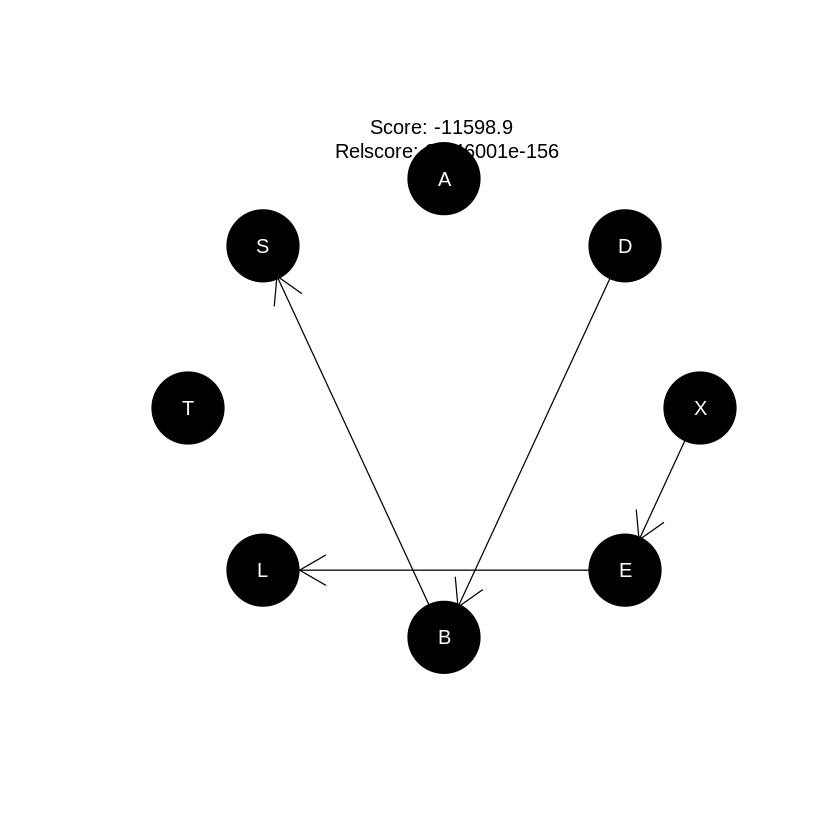

(5) -11484.02 [A][S|B][T][L|T:E][B|D][E|X][X][D]
..

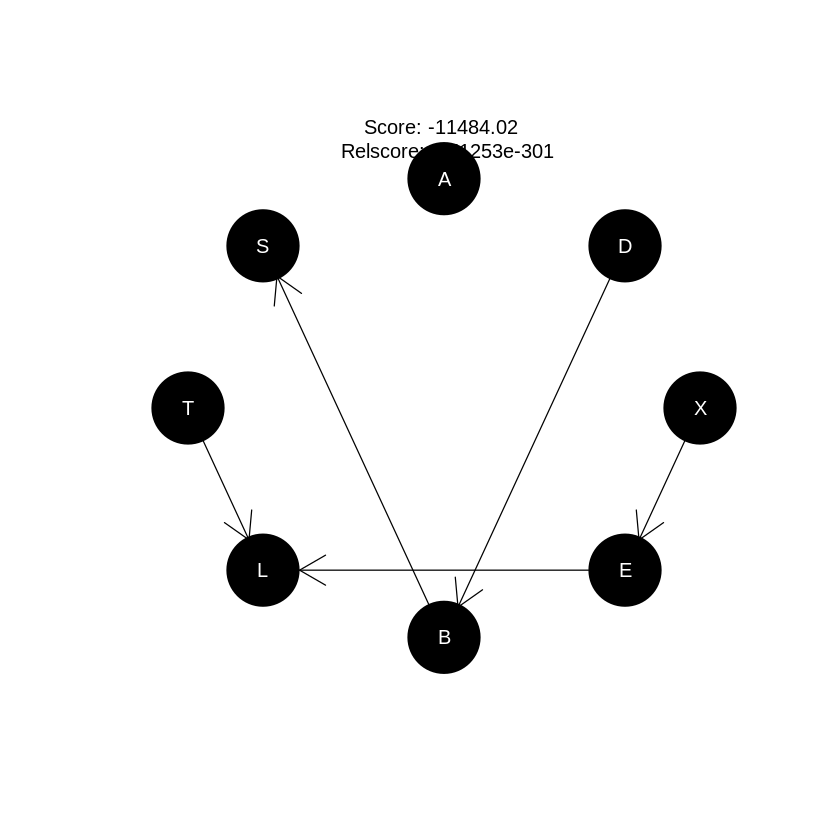

(6) -11370.16 [A][S|B][T|E][L|T:E][B|D][E|X][X][D]
..

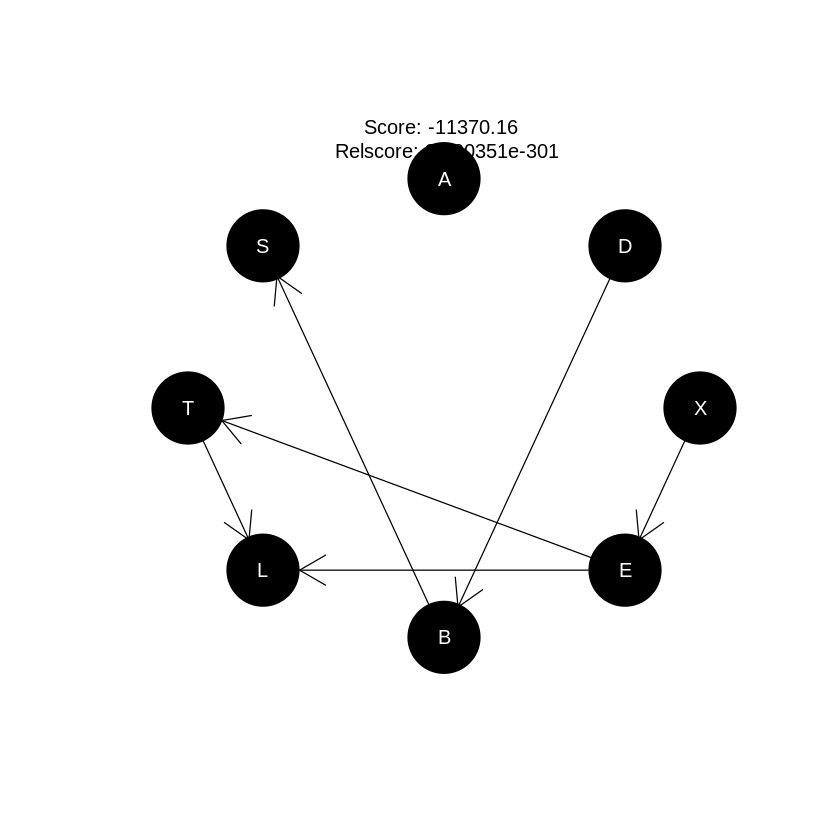

(7) -11260.04 [A][S|L:B][T|E][L|T:E][B|D][E|X][X][D]
...

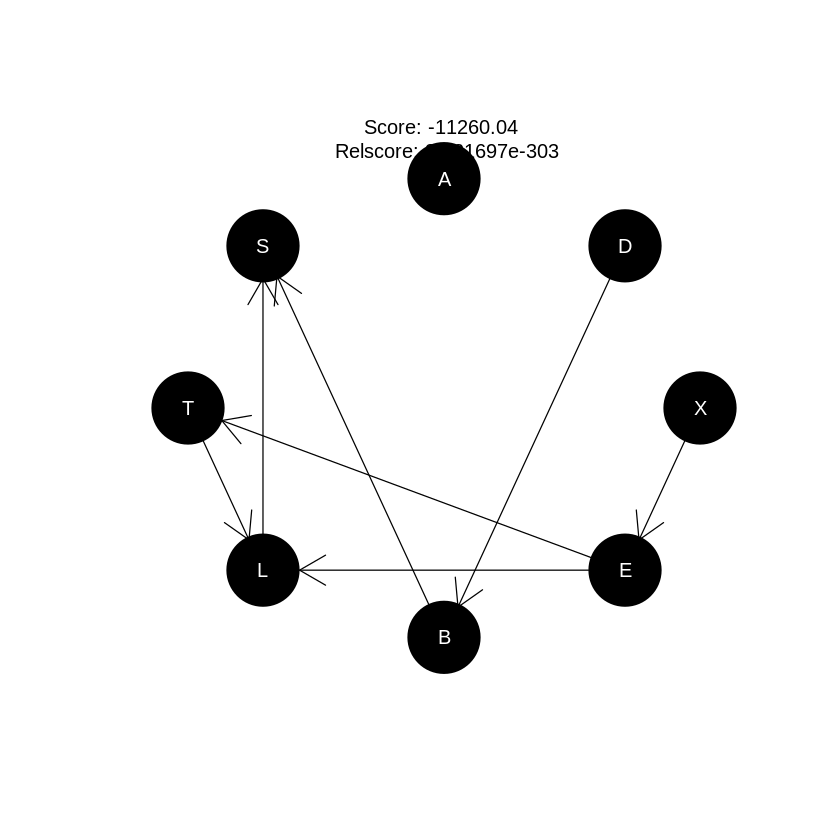

(8) -11168.29 [A][S|L:B][T|E][L|T:E][B|D][E|X][X][D|E]
.....

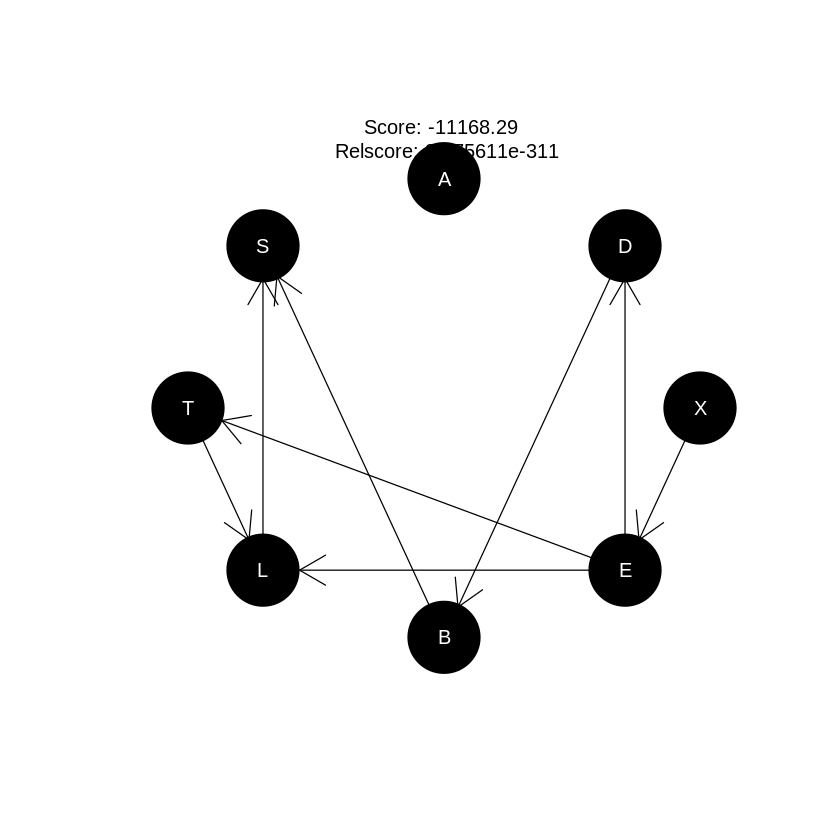

(9) -11117.6 [A][S|L:B][T|E][L|T:E][B|E:D][E|X][X][D|E]
........

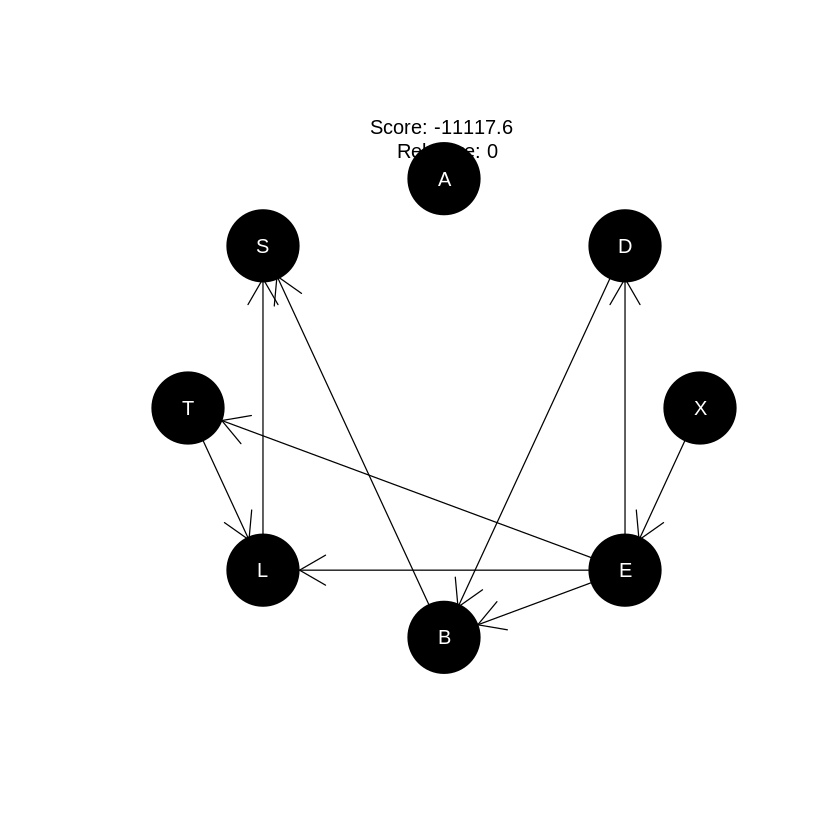

(10) -11114.77 [A|T][S|L:B][T|E][L|T:E][B|E:D][E|X][X][D|E]
........

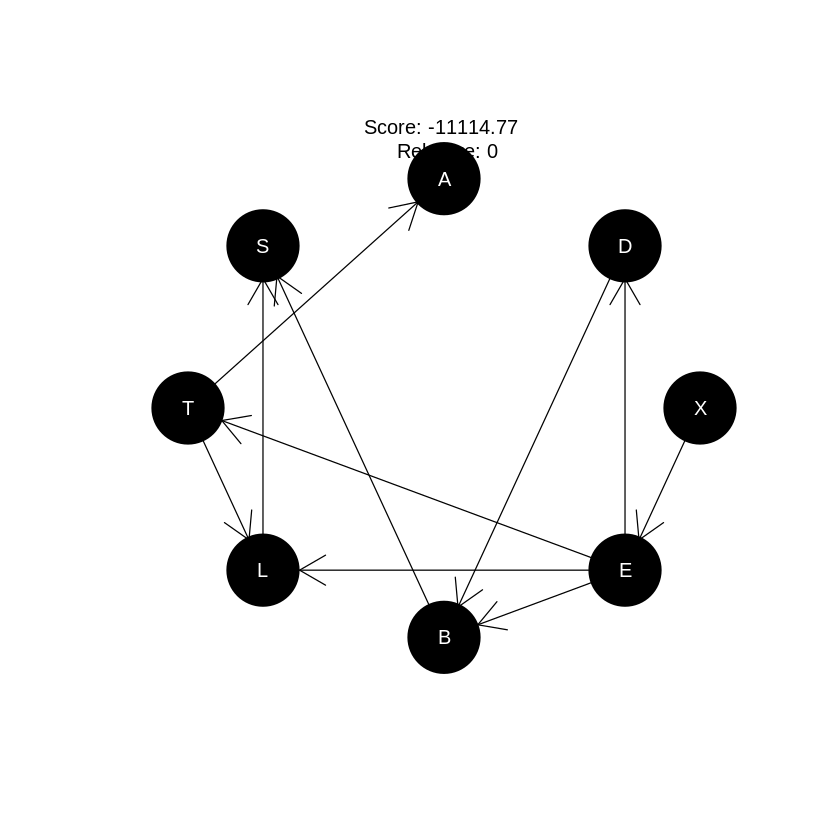

(11) -11114.16 [A|T][S|L:B][T|E][L|T:E:X][B|E:D][E|X][X][D|E]
........

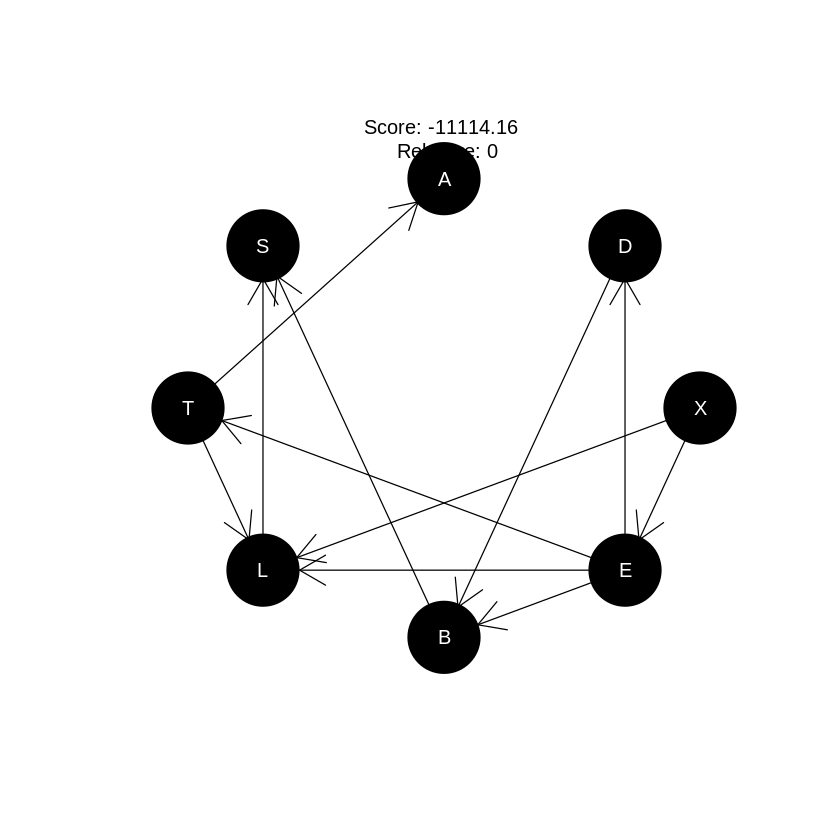

(12) -11114.13 [A|T][S|L:B][T|E:X][L|T:E:X][B|E:D][E|X][X][D|E]
........

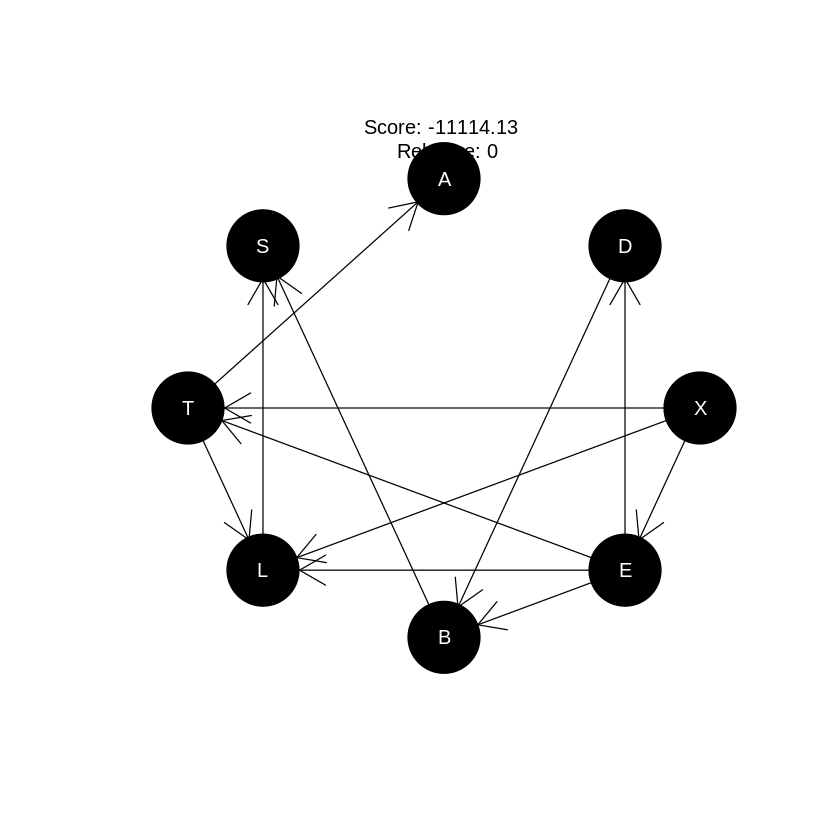

(13) -11114.13 [A|T][S|L:B][T|E:X][L|T:E:X][B|E][E|X][X][D|B:E]
.......Total 0.797 add 0.174 rem 0.009 turn 0.025 sort 0.003 choose 0.014 rest 0.572 ]


[1] "[A|T][S|L:B][T|E:X][L|T:E:X][B|E][E|X][X][D|B:E]"

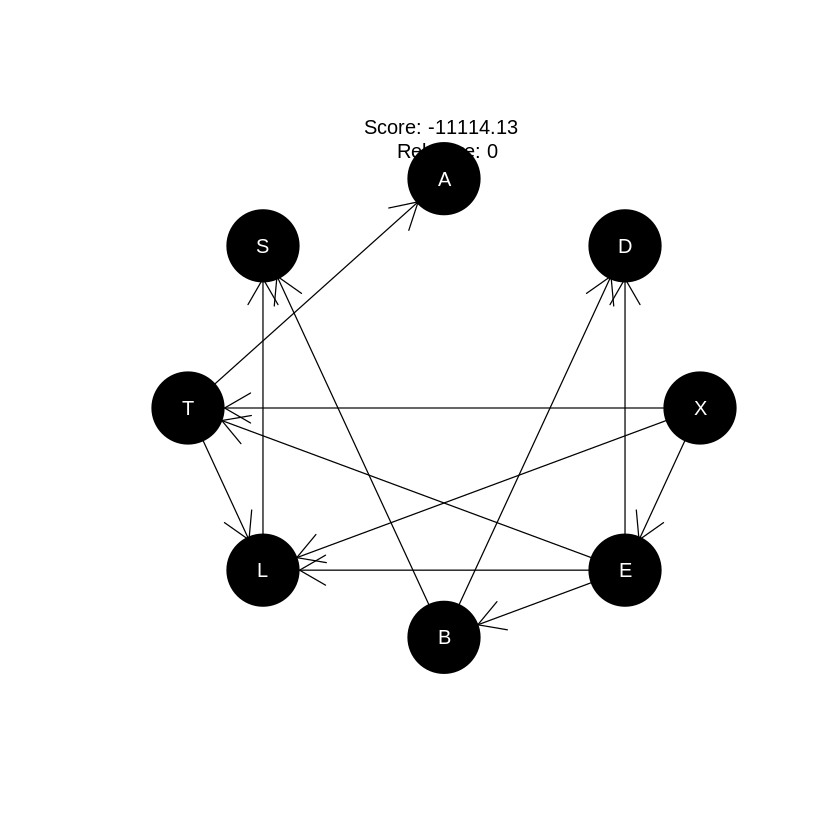

In [74]:
#install.packages("deal")
library(deal)
bn.hc = hc(asia)
#bn.hc

net = network(asia)
prior = jointprior(net, N = 5)
net = learn(net, asia, prior)$nw
best = autosearch(net, asia, prior)
mstring = deal::modelstring(best$nw)
mstring

In [80]:
score(dag, data = asia, type = "bic")
score(bn.hc, data = asia, type = "bic")


ERROR: ignored

b) Ajuste una red Bayesiana empleando algún método de puntuación y algún método híbrido. ¿Cuál da un menor valor de BIC?

- **Método en puntuación**

In [75]:
bnlearn::score(dag, asia, type = "bic")

bn.hc = hc(asia,type = "bic")
bn.hc
bnlearn::score(bn.hc, asia, type = "bic")

[1] -11109.74

Warning message in check.unused.args(extra, c(learning.extra.args[[heuristic]], :
“unused argument(s): 'type'.”



  Bayesian network learned via Score-based methods

  model:
   [A][S][T][L|S][B|S][E|T:L][X|E][D|B:E] 
  nodes:                                 8 
  arcs:                                  7 
    undirected arcs:                     0 
    directed arcs:                       7 
  average markov blanket size:           2.25 
  average neighbourhood size:            1.75 
  average branching factor:              0.88 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              4.258597 
  tests used in the learning procedure:  77 
  optimized:                             TRUE 


[1] -11107.29


  Random/Generated Bayesian network

  model:
    [undirected graph]
  nodes:                                 5 
  arcs:                                  7 
    undirected arcs:                     7 
    directed arcs:                       0 
  average markov blanket size:           2.80 
  average neighbourhood size:            2.80 
  average branching factor:              0.00 

  generation algorithm:                  Empty 


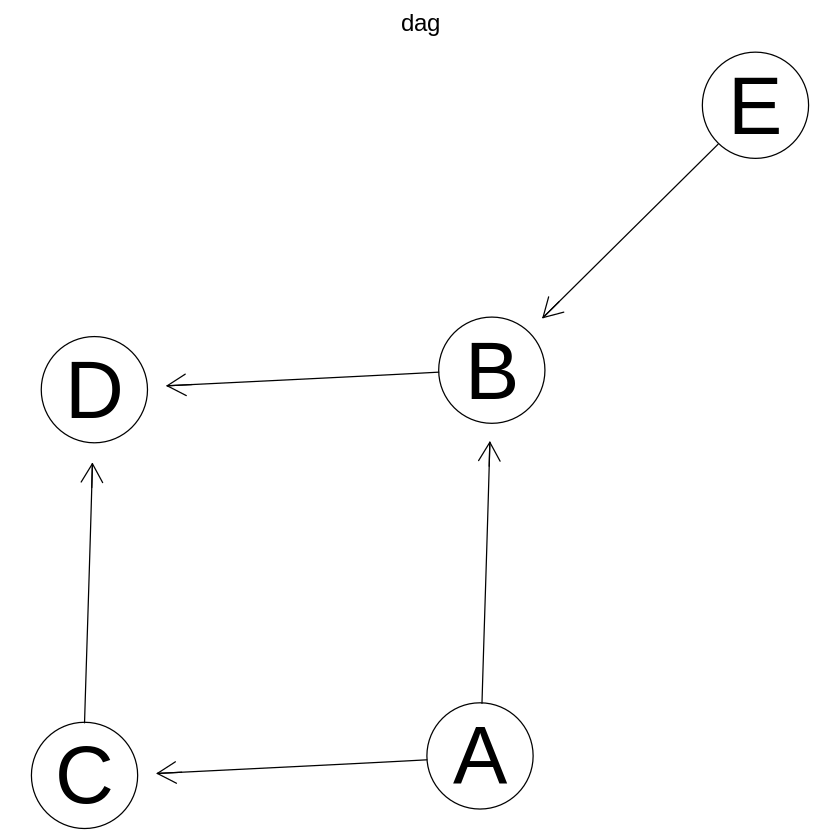

In [ ]:
# Semiñlla
set.seed(123)

# COnstruimos una red
dag <- empty.graph(c("A", "B", "C","D","E"))
dag <- set.arc(dag, "A", "B")
dag <- set.arc(dag, "A", "C")
dag <- set.arc(dag, "C", "D")
dag <- set.arc(dag, "B", "D")
dag <- set.arc(dag, "E", "B")

#Estrucutura
#plot(dag)
graphviz.plot(dag, main = "dag",layout = "neato")

moral(dag)

In [ ]:
# Matriz ejemplo
datab <- matrix(sample(c(0, 1), 30 * 6, replace = TRUE), nrow = 30)

#Hacemos la matiz en un DF
data <- as.data.frame(datab)

# Nombres
colnames(data) <- c("Col1", "Col2", "Col3", "Col4", "Col5", "Col6")


head(data)



,Col1,Col2,Col3,Col4,Col5,Col6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,1,0,0
2,0,1,1,1,1,1
3,0,0,1,0,0,0
4,1,1,0,1,0,1
5,0,1,0,1,0,0
6,1,0,1,0,1,0


In [ ]:
asiags<-gs(asia)

In [ ]:
asiags
score(asiags, data=asia)


  Bayesian network learned via Constraint-based methods

  model:
   [A][S][T][L][X][D][B|S:D][E|T:L] 
  nodes:                                 8 
  arcs:                                  4 
    undirected arcs:                     0 
    directed arcs:                       4 
  average markov blanket size:           1.50 
  average neighbourhood size:            1.00 
  average branching factor:              0.50 

  learning algorithm:                    Grow-Shrink 
  conditional independence test:         Mutual Information (disc.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  135 


[1] -12526.5

In [ ]:
graphviz.plot(asiags, main = "Asia Grown.Shrink")
#P(A)P(S)P(D)P(T)P(L)P(X)P(B|S:D)P(E|T:L)

ERROR: ignored

In [ ]:
# Método de Grow-Shrink
datags <- gs(data)

datags


  Bayesian network learned via Constraint-based methods

  model:
   [Col1][Col2][Col3][Col4][Col5][Col6] 
  nodes:                                 6 
  arcs:                                  0 
    undirected arcs:                     0 
    directed arcs:                       0 
  average markov blanket size:           0.00 
  average neighbourhood size:            0.00 
  average branching factor:              0.00 

  learning algorithm:                    Grow-Shrink 
  conditional independence test:         Pearson's Correlation 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  30 


In [ ]:
# Método de Hill-Climbing
datahc <- hc(data)
datahc


  Bayesian network learned via Score-based methods

  model:
   [Col1][Col2][Col3][Col4][Col5][Col6] 
  nodes:                                 6 
  arcs:                                  0 
    undirected arcs:                     0 
    directed arcs:                       0 
  average markov blanket size:           0.00 
  average neighbourhood size:            0.00 
  average branching factor:              0.00 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (Gauss.) 
  penalization coefficient:              1.700599 
  tests used in the learning procedure:  15 
  optimized:                             TRUE 


In [ ]:
# Método de Hiton PC
datahpc<- si.hiton.pc(data,  alpha=0.001)
datahpc


  Bayesian network learned via Constraint-based methods

  model:
   [Col1][Col2][Col3][Col4][Col5][Col6] 
  nodes:                                 6 
  arcs:                                  0 
    undirected arcs:                     0 
    directed arcs:                       0 
  average markov blanket size:           0.00 
  average neighbourhood size:            0.00 
  average branching factor:              0.00 

  learning algorithm:                    Semi-Interleaved HITON-PC 
  conditional independence test:         Pearson's Correlation 
  alpha threshold:                       0.001 
  tests used in the learning procedure:  30 


In [ ]:
# Método de Lista Tabú
datat<- tabu(data)
datat


  Bayesian network learned via Score-based methods

  model:
   [Col1][Col2][Col3][Col4][Col5][Col6] 
  nodes:                                 6 
  arcs:                                  0 
    undirected arcs:                     0 
    directed arcs:                       0 
  average markov blanket size:           0.00 
  average neighbourhood size:            0.00 
  average branching factor:              0.00 

  learning algorithm:                    Tabu Search 
  score:                                 BIC (Gauss.) 
  penalization coefficient:              1.700599 
  tests used in the learning procedure:  91 
  optimized:                             TRUE 


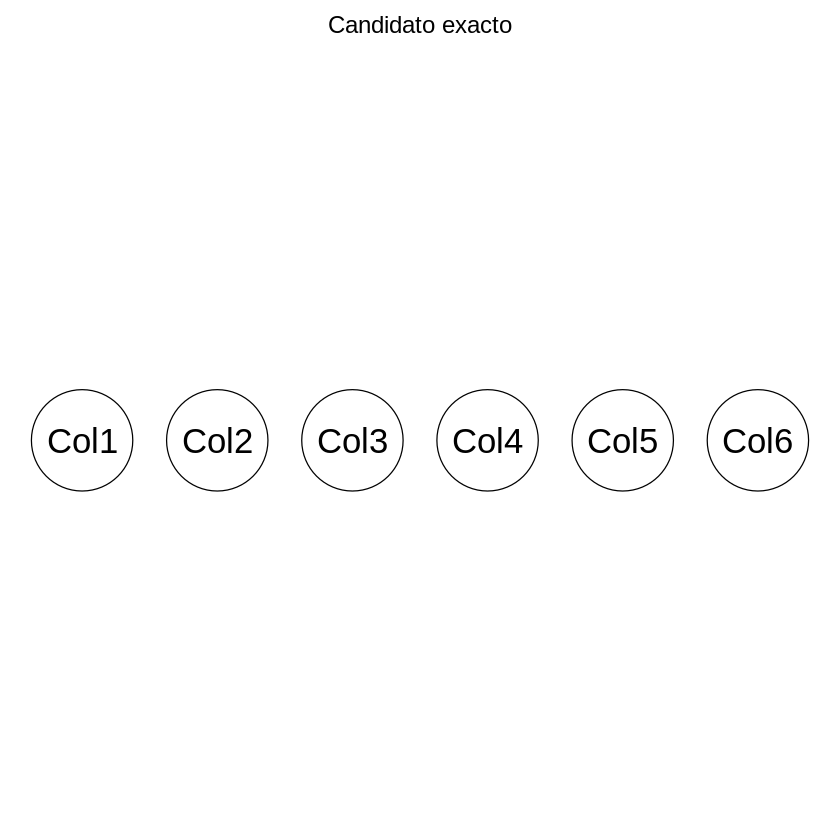

In [ ]:
# Método de Candidato Escaso
datace <- rsmax2(data)
graphviz.plot(datace,main = "Candidato exacto")

In [ ]:
#Calcular BIC
score(datags, data = data, type = "bic-g")
score(datahc, data = data, type = "bic-g")
score(datahpc, data =data, type = "bic-g")
score(datat, data = data, type = "bic-g")
score(datace, data = data, type = "bic-g")

[1] -148.216

[1] -148.216

[1] -148.216

[1] -148.216

[1] -148.216

In [ ]:
all.equal(datags, datat)


[1] TRUE

In [ ]:
chld <- children(datace, "Col1")
chld

character(0)

In [ ]:
moral(datace)


  Bayesian network learned via Hybrid methods

  model:
   [Col1][Col2][Col3][Col4][Col5][Col6] 
  nodes:                                 6 
  arcs:                                  0 
    undirected arcs:                     0 
    directed arcs:                       0 
  average markov blanket size:           0.00 
  average neighbourhood size:            0.00 
  average branching factor:              0.00 

  learning algorithm:                    Two-Phase Restricted Maximization 
  constraint-based method:               Semi-Interleaved HITON-PC 
  conditional independence test:         Pearson's Correlation 
  score-based method:                    Hill-Climbing 
  score:                                 BIC (Gauss.) 
  alpha threshold:                       0.05 
  penalization coefficient:              1.700599 
  tests used in the learning procedure:  30 
  optimized:                             TRUE 


In [ ]:
mb(datace,"Col1")

character(0)